# Solving Koshi problem for first-order linear differential equation using Runge-Kutta method order 4

In [42]:
import numpy as np
import matplotlib.pyplot as plt

## Defining equation and initial conditions
$y' = f(x, y)$, $y(x_{0}) = y_{0}$

Let's take as an example: $y' = 3*y - x - x^2$ and $y(0) = 1$

Analytical solution for this case will be $y(x) = \frac{1}{27} (9 x^{2} + 15 x + 22 e^{3 x} + 5)$

In [43]:
def f(x, y):
    return 3 * y - x - x**2
def initial_conditions():
    return 0, 1

In [44]:
# will be used for comparison of results
def analytical_solution(x):
    return 1/27 * (9 * x**2 + 15 * x + 22 * np.exp(3*x) + 5)

## Runge-Kutta method
Let's assume we have $y_{i}$ and equation $y' = f(x, y)$.

Obviously, $y_{i+1} = y_{i} + \delta y_{i}$, where $\delta y_{i} = \int_{x_{i}}^{x_{i+1}} y'dx$: 

Simplest approach is to use left rectangles formula for numerical integration:

$y_{i+1} = y_{i} + h * y'$, where $h = x_{i+1} - x_{i}$ - Euler's method.

To improve this solution, we can use more accurate formula for numerical integration.
If we'll use Simpson's formula, we get Runge-Kutta method of order 4.

Formula for this method:
$\delta y_{i} = \frac{h}{6} * (k_{1} + 2k_{2} + 2k_{3} + k_{4})$, where

$k_{1} = f(x_{i}, y_{i})$

$k_{2} = f(x_{i} + \frac{h}{2}, y_{i} + \frac{hk_{1}}{2})$

$k_{3} = f(x_{i} + \frac{h}{2}, y_{i} + \frac{hk_{2}}{2})$

$k_{4} = f(x_{i} + h, y_{i} + k_{3})$

In [45]:
h = float(input('Enter step h: '))
n = int(input('Enter number of points n: '))

Enter step h: 0.1
Enter number of points n: 100


In [46]:
x = np.zeros((n, ))
y = np.zeros((n, ))
x[0], y[0] = initial_conditions()
for i in range(n - 1):
    k1 = f(x[i], y[i])
    k2 = f(x[i] + h/2, y[i] + h*k1/2)
    k3 = f(x[i] + h/2, y[i] + h*k2/2)
    k4 = f(x[i] + h, y[i] + h*k3)
    x[i + 1] = x[i] + h
    y[i + 1] = y[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)

## Visualising results

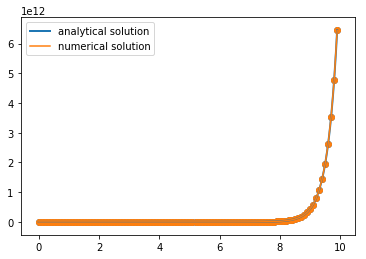

In [47]:
x_analytical = np.linspace(x[0], x[n-1], num=1000)
plt.plot(x_analytical, analytical_solution(x_analytical), color='C0', label='analytical solution', linewidth=2)
plt.scatter(x, analytical_solution(x), color='C0')
plt.plot(x, y, color='C1', label='numerical solution')
plt.scatter(x, y, color='C1')
plt.legend()